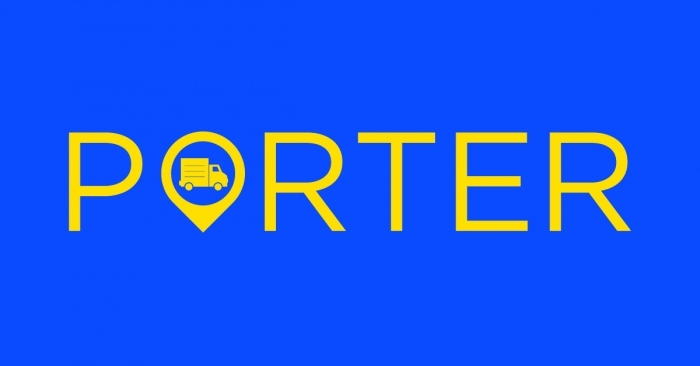

## About the Problem
Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

Porter works with a wide range of restaurants for delivering their items directly to the people.

Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features

## About the fields
- 1. market_id : integer id for the market where the restaurant lies
- 2. created_at : the timestamp at which the order was placed
- 3. actual_delivery_time : the timestamp when the order was delivered
- 4. store_primary_category : category for the restaurant
- 5. order_protocol : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)
- 6. total_items subtotal : final price of the order
- 7. num_distinct_items : the number of distinct items in the order
- 8. min_item_price : price of the cheapest item in the order
- 9. max_item_price : price of the costliest item in order
- 10. total_onshift_partners : number of delivery partners on duty at the time order was placed
- 11. total_busy_partners : number of delivery partners attending to other tasks
- 12. total_outstanding_orders : total number of orders to be fulfilled at the moment

## Importing the packages

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
warnings.simplefilter('ignore')

## Loading the Dataset

In [64]:
df  = pd.read_csv('dataset.csv')
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


## Shape of the data

In [65]:
df.shape

(197428, 14)

## Information about the dataset

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

## Checking for missing values

In [67]:
df.isna().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

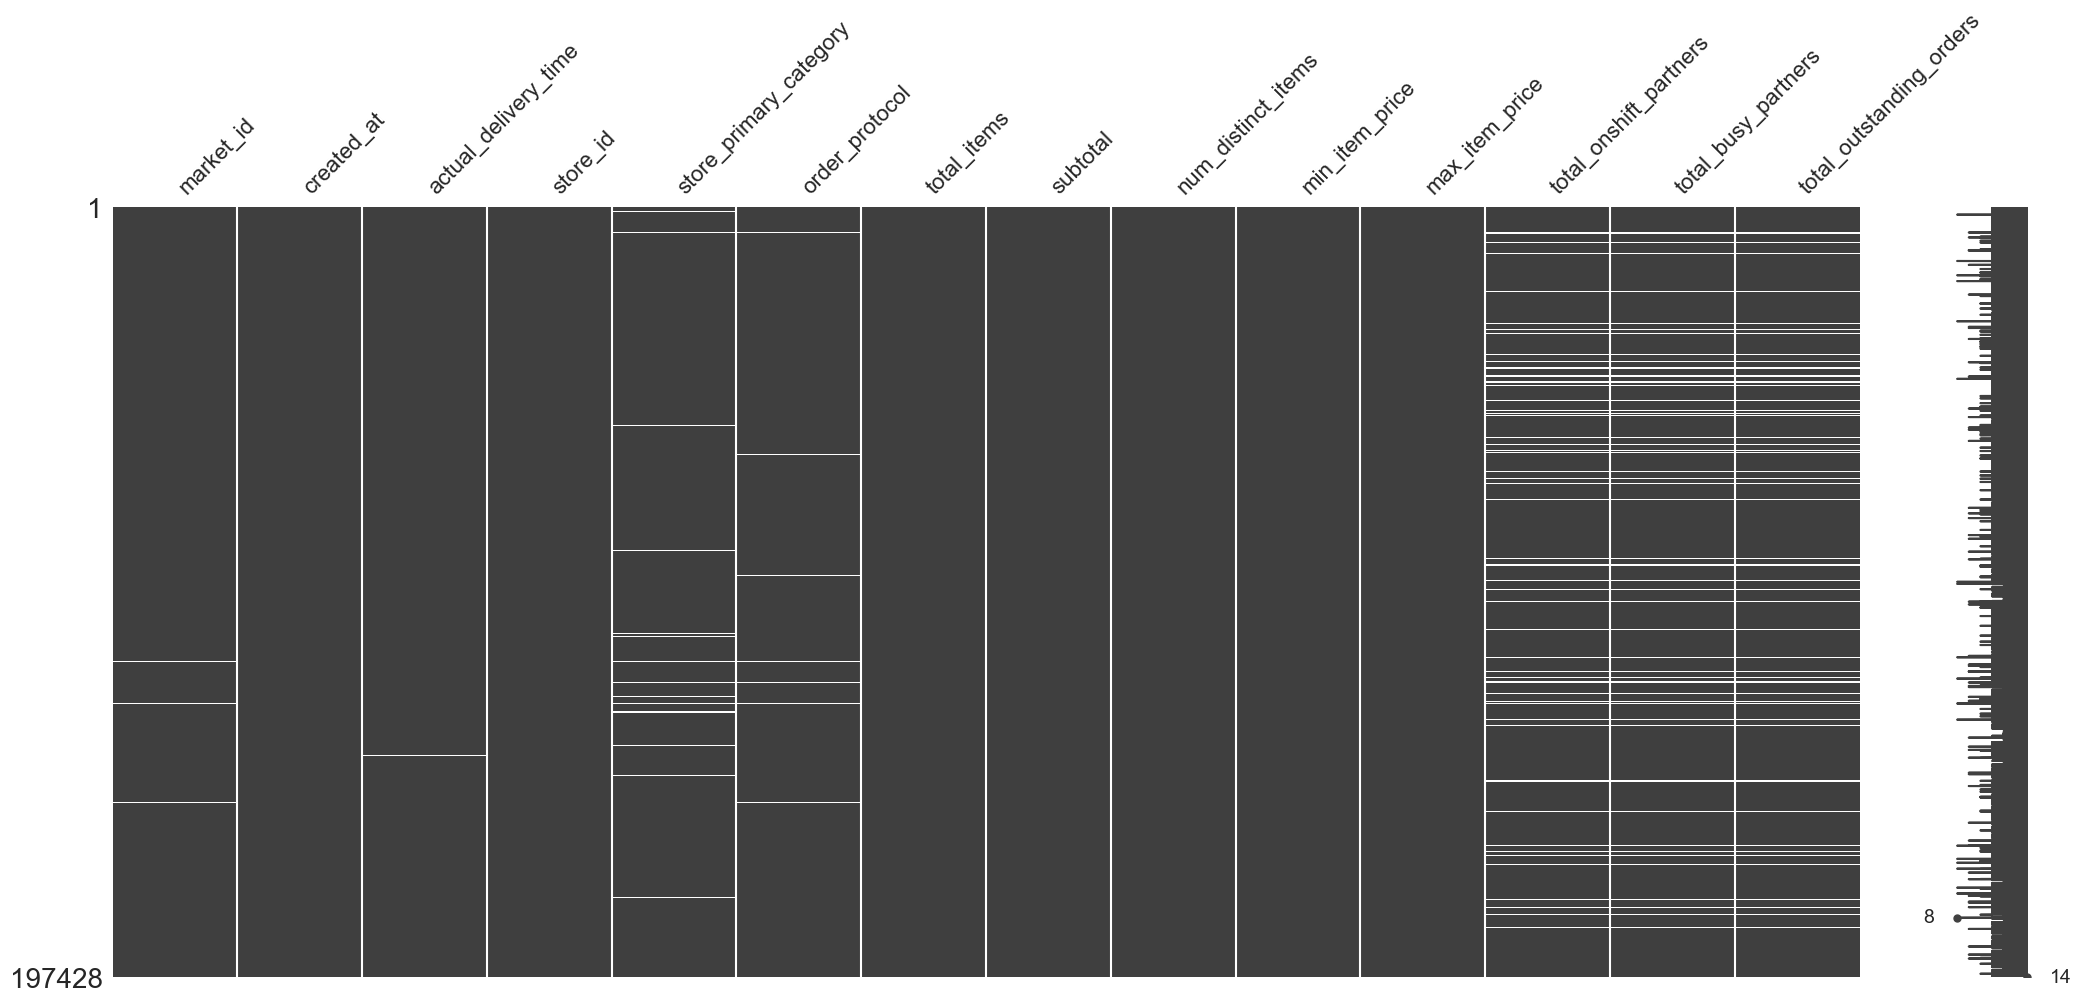

In [68]:
## Visualizing the null values
msno.matrix(df)
plt.show()

## Observations:
- Following Columns have missing values;
    - Market Id
    - Actual Delivery Time
    - Store primary category
    - Order protocol
    - Total onshift partners
    - Total busy partners
    - Total outstanding orders

## Converting to datetime format

In [69]:
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['created_at'] = pd.to_datetime(df['created_at'])

## Finding the missing values

In [70]:
# Taking the mode of market id to replace the missing value
a = df['market_id'].mode()
a = a[0]
a

2.0

In [71]:
df['market_id'] = df['market_id'].fillna(a)

In [72]:
# Taking mode of actual_delivery_time to replace the missing values
a = df['actual_delivery_time'].mode()
a

0   2015-01-24 03:41:03
1   2015-02-01 03:44:13
2   2015-02-05 03:10:31
3   2015-02-08 04:09:25
4   2015-02-11 20:40:45
5   2015-02-12 03:14:14
6   2015-02-16 03:51:49
Name: actual_delivery_time, dtype: datetime64[ns]

In [73]:
# We take the max mode becuase we want our actual delivery time to be bigger than created at time.
a = a[6]
a

Timestamp('2015-02-16 03:51:49')

In [74]:
df['actual_delivery_time'] = df['actual_delivery_time'].fillna(a)

In [75]:
# Taking mode of store category to replace the missing values
a = df['store_primary_category'].mode()
a = a[0]
a

'american'

In [76]:
df['store_primary_category'] = df['store_primary_category'].fillna(a)

In [77]:
# Taking mode of order protocol to replace the missing values
a = df['order_protocol'].mode()
a = a[0]
a

1.0

In [78]:
df['order_protocol'] = df['order_protocol'].fillna(a)

In [79]:
# Taking median of total onshift partners to replace the missing values
a = df['total_onshift_partners'].median()
a 

37.0

In [80]:
df['total_onshift_partners'] = df['total_onshift_partners'].fillna(a)

In [81]:
# Taking median of total busy partners to replace the missing values
a = df['total_busy_partners'].median()
a

34.0

In [82]:
df['total_busy_partners'] = df['total_busy_partners'].fillna(a)

In [83]:
# Taking median of total outstanding orders to replace the missing values
a = df['total_outstanding_orders'].median()
a

41.0

In [84]:
df['total_outstanding_orders'] = df['total_outstanding_orders'].fillna(a)

In [85]:
df.isna().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64

## Feature Engineering

In [86]:
# Creating the target variable
df['time_taken_mins'] = (df['actual_delivery_time']-df['created_at'])/pd.Timedelta(minutes = 1)

In [87]:
# Ordered Hour
df['order_hour'] = df['created_at'].dt.hour

In [88]:
# Ordered Day
df['order_day'] = df['created_at'].dt.day_name()

## Univariate Analysis

In [89]:
a = df['market_id'].value_counts().reset_index(name = 'order_counts')
a

,market_id,order_counts
0,2.0,56045
1,4.0,47599
2,1.0,38037
3,3.0,23297
4,5.0,18000
5,6.0,14450


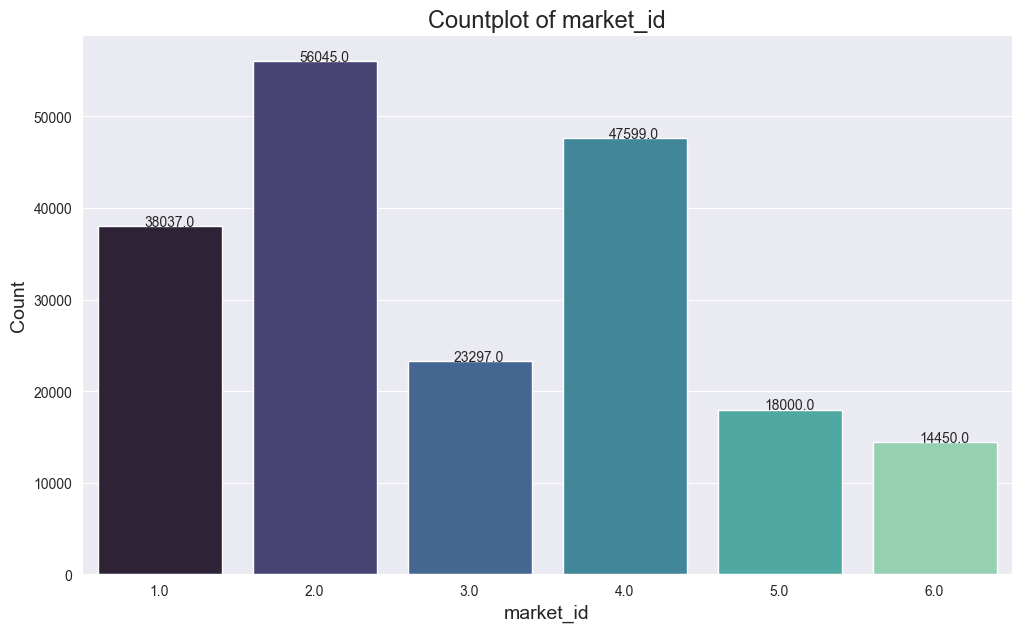

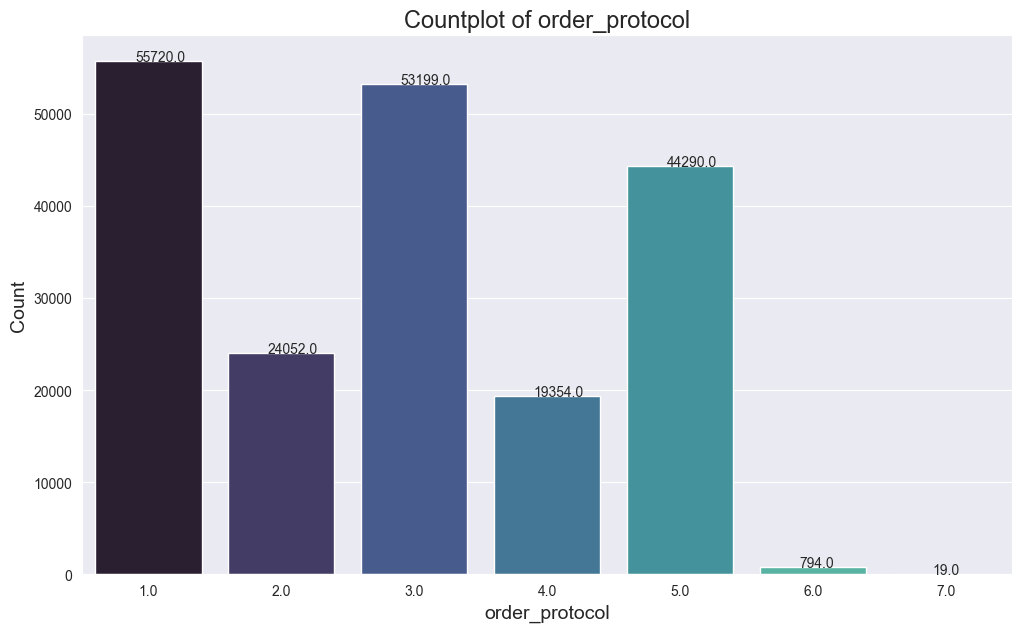

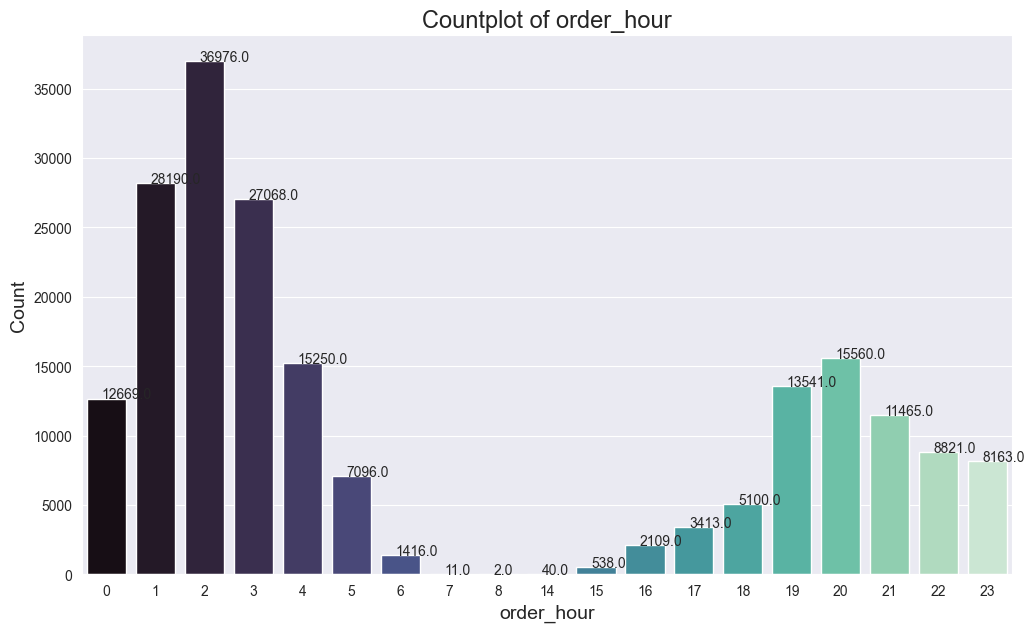

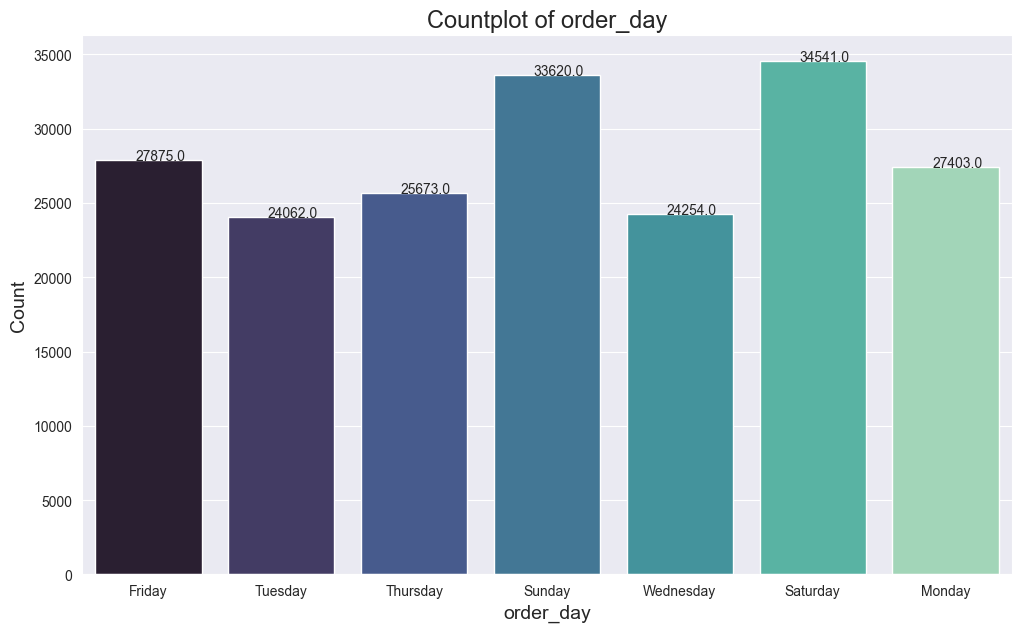

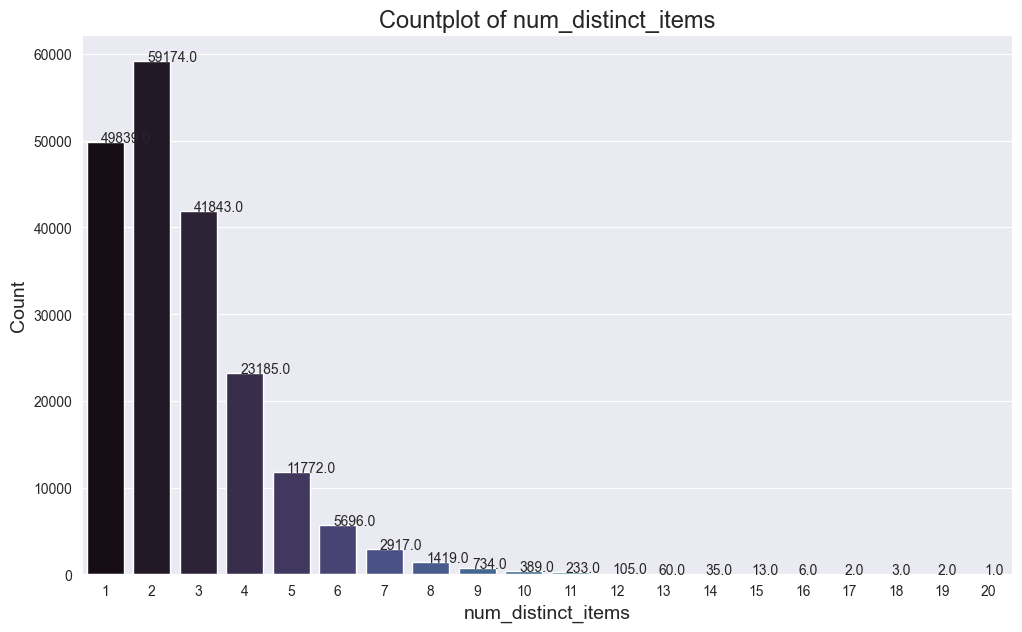

In [90]:
l = ['market_id','order_protocol','order_hour','order_day','num_distinct_items']
for i in l:
    plt.figure(figsize = (12,7))
    sns.set_style('darkgrid')
    ax = sns.countplot(data = df,x = i,palette = 'mako')
    for p in ax.patches:
        ax.annotate(p.get_height(),(p.get_x()+0.30,p.get_height()+1))
    plt.title(f'Countplot of {i}',fontsize = 17)
    plt.xlabel(i,fontsize = 14)
    plt.ylabel('Count',fontsize = 14)
    plt.show()


## Observations
- Market ID 2 has the highest number of orders and market id 6 has the lowest number of orders.
- Order protocol 1 has the higest number of orders and 7 has the lowest number of orders.
- The highest number of orders were observed at 2 AM.
- The highest number of orders were observed on Saturday.
- Most of the  orders had 2 disctint items.

In [91]:
# Top 10 ordered catergory of stores
a = df['store_primary_category'].value_counts().reset_index(name = 'counts')
a = a.loc[0:10,:]
a

,store_primary_category,counts
0,american,24159
1,pizza,17321
2,mexican,17099
3,burger,10958
4,sandwich,10060
5,chinese,9421
6,japanese,9196
7,dessert,8773
8,fast,7372
9,indian,7314


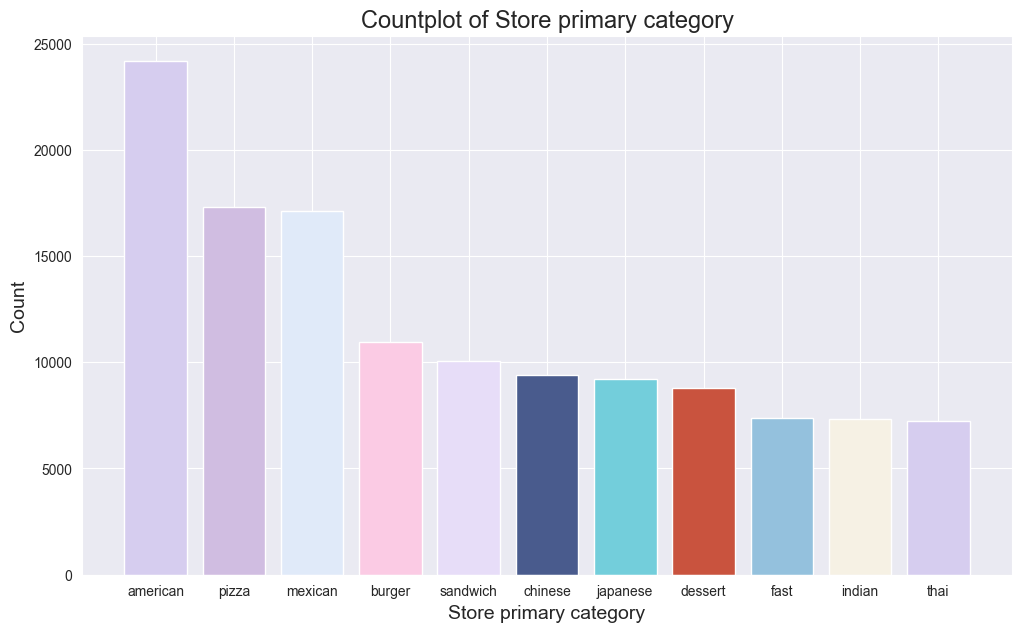

In [92]:
c = ['#d6cdef','#d0bde1','#e0eaf9','#fbcbe4','#e7ddf8','#495b8d','#73cedb','#c9533e','#94c1dd','#f6f1e4']
plt.figure(figsize = (12,7))
plt.bar(a['store_primary_category'],a['counts'],color = c )
plt.title('Countplot of Store primary category',fontsize = 17)
plt.xlabel('Store primary category',fontsize = 14)
plt.ylabel('Count',fontsize = 14)
plt.show()

## Observations:
- Among the top 10 highest ordered store primary category, American had the highest number of orders. 

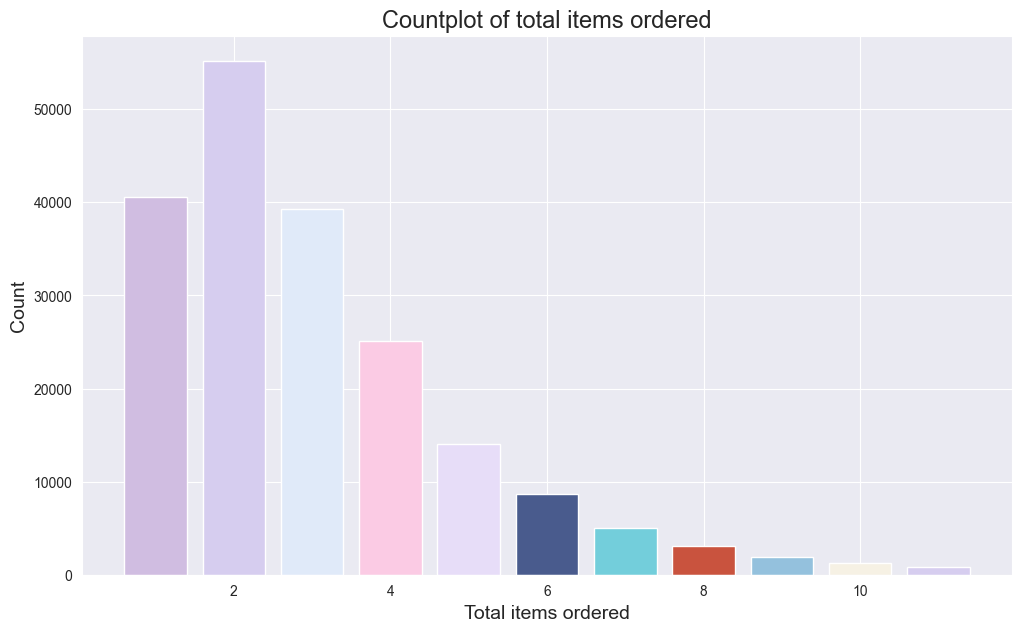

In [93]:
# Top 10 number of items ordered
a = df['total_items'].value_counts().reset_index(name = 'counts')
a = a.loc[0:10,:]
c = ['#d6cdef','#d0bde1','#e0eaf9','#fbcbe4','#e7ddf8','#495b8d','#73cedb','#c9533e','#94c1dd','#f6f1e4']
plt.figure(figsize = (12,7))
plt.bar(a['total_items'],a['counts'],color = c )
plt.title('Countplot of total items ordered',fontsize = 17)
plt.xlabel('Total items ordered',fontsize = 14)
plt.ylabel('Count',fontsize = 14)
plt.show()

## Observations:
- Majority of the orders had 2 total items.

In [94]:
num_cols = ['subtotal','min_item_price','max_item_price','subtotal','min_item_price',
       'max_item_price','total_onshift_partners','total_busy_partners',
       'total_outstanding_orders']

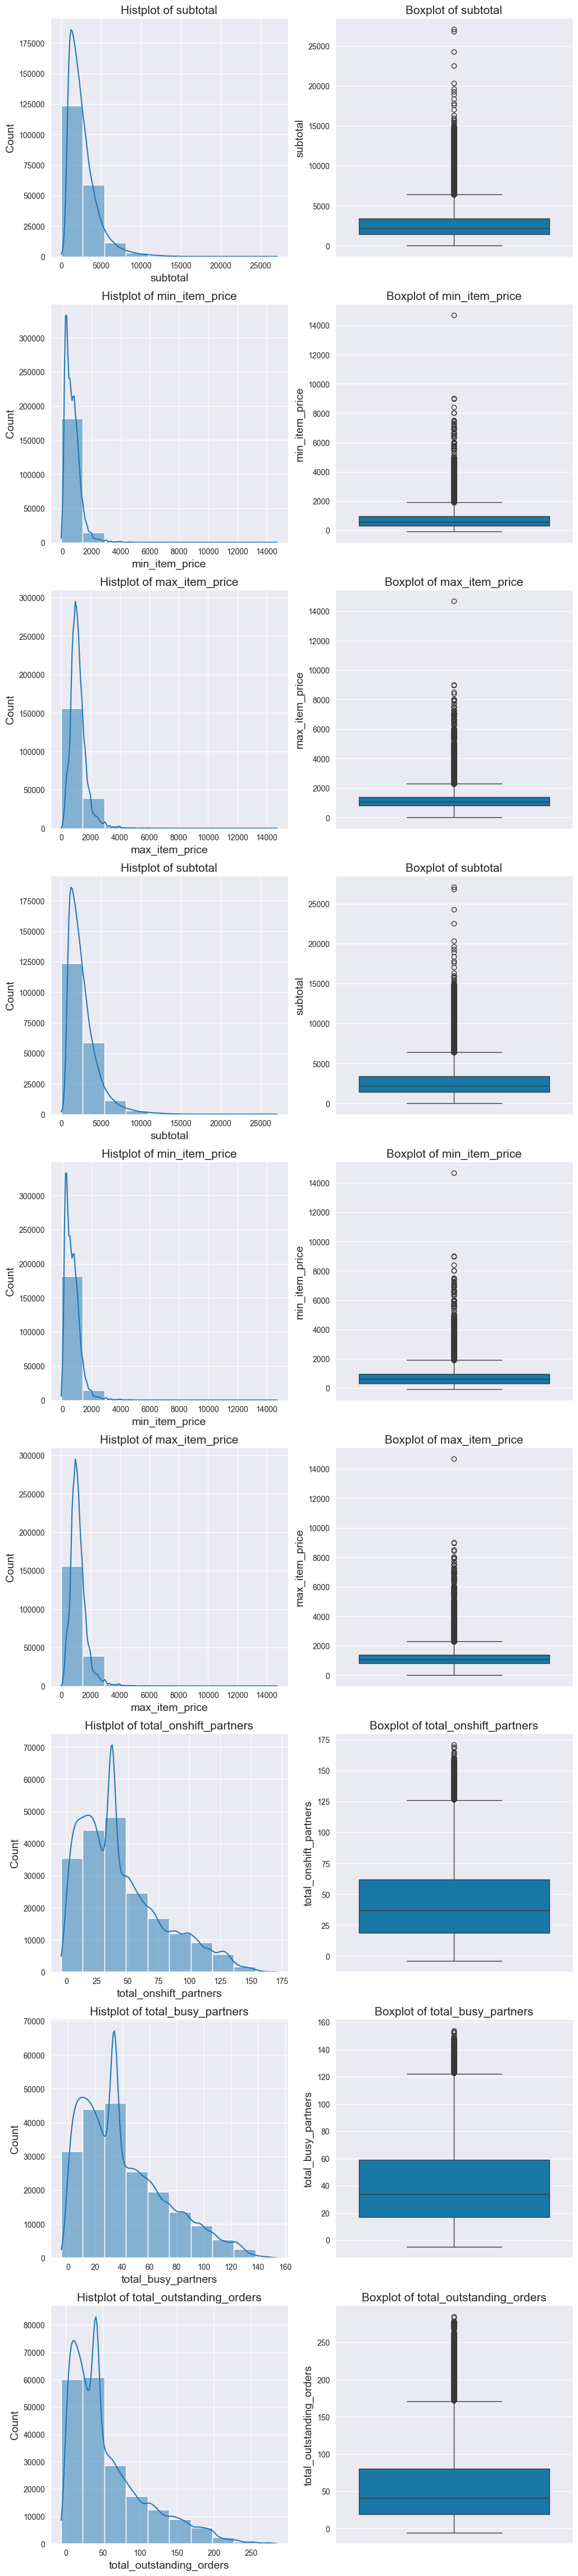

In [95]:
plt.figure(figsize = (12,65))
for i in range(len(num_cols)):
    plt.subplot(10,2,(2*i)+1)
    sns.histplot(data = df, x = num_cols[i],kde = True,bins = 10,palette = 'cubehelix')
    plt.title(f'Histplot of {num_cols[i]}',fontsize = 15)
    plt.xlabel(f'{num_cols[i]}',fontsize = 14)
    plt.ylabel('Count',fontsize = 14)

    plt.subplot(10,2,(2*i)+2)
    sns.boxplot(data = df, y = num_cols[i],palette = 'winter')
    plt.title(f'Boxplot of {num_cols[i]}',fontsize = 15)
    plt.ylabel(f'{num_cols[i]}',fontsize = 14)
plt.show()

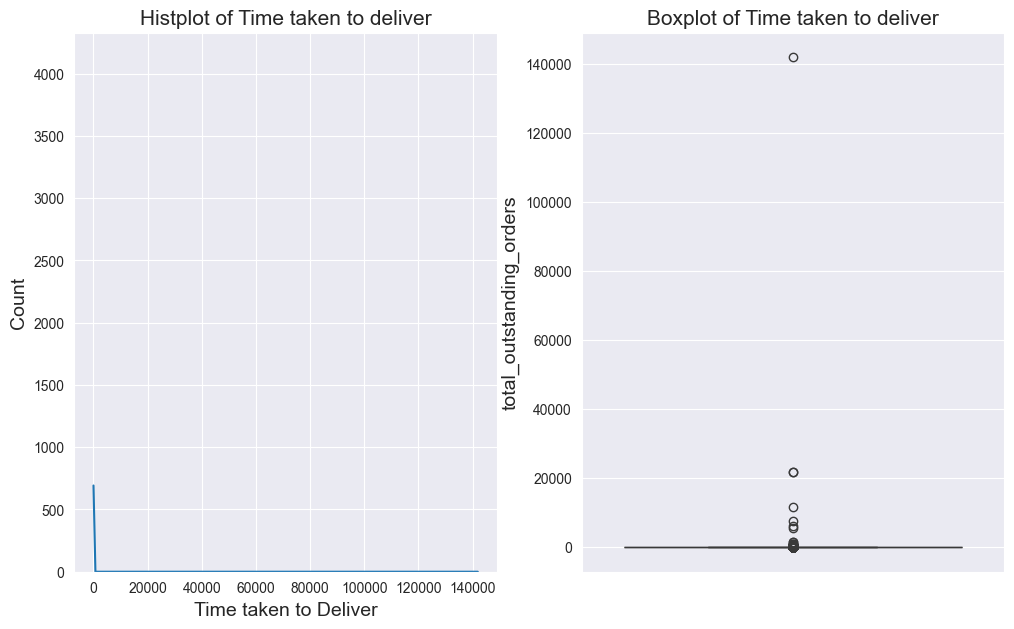

In [96]:
plt.figure(figsize = (12,7))
plt.subplot(1,2,1)
sns.histplot(data = df, x = 'time_taken_mins',kde = True,palette = 'cubehelix')
plt.title('Histplot of Time taken to deliver',fontsize = 15)
plt.xlabel('Time taken to Deliver',fontsize = 14)
plt.ylabel('Count',fontsize = 14)

plt.subplot(1,2,2)
sns.boxplot(data = df, y = 'time_taken_mins',palette = 'winter')
plt.title('Boxplot of Time taken to deliver',fontsize = 15)
plt.ylabel(f'{num_cols[i]}',fontsize = 14)
plt.show()

## Observations
- All the features showed outliers

## Bivariate Analysis

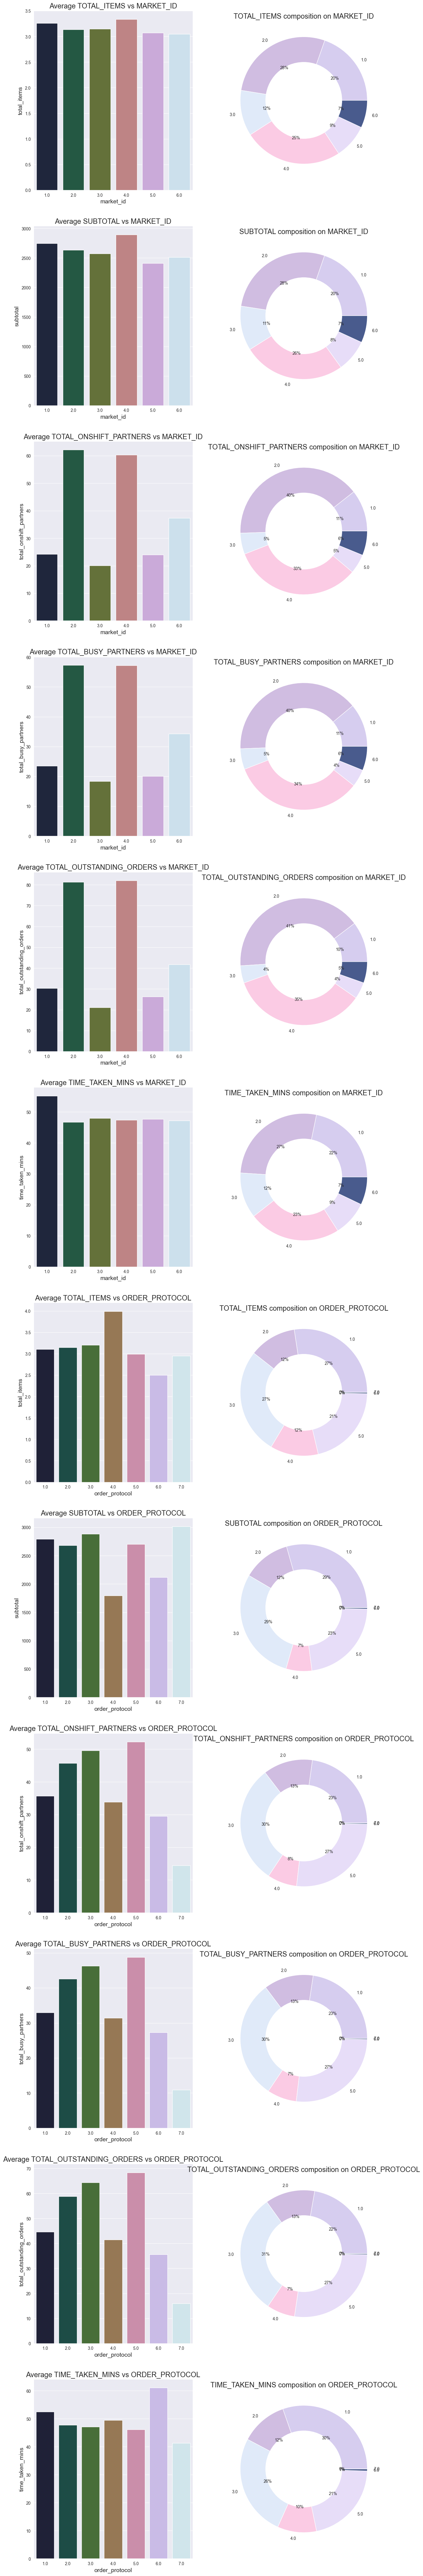

In [97]:
color = ['#d6cdef','#d0bde1','#e0eaf9','#fbcbe4','#e7ddf8',
         '#495b8d','#73cedb','#c9533e','#94c1dd','#f6f1e4']
c = ['market_id','order_protocol']
n = ['total_items','subtotal','total_onshift_partners','total_busy_partners',
     'total_outstanding_orders','time_taken_mins']
plt.figure(figsize = (15,110))
p = 1
for i in c:
    for j in n:
        a = df.groupby(i)[j].mean().reset_index()
        plt.subplot(12,2,p)
        sns.barplot(data = a, x = i,y = j,palette = 'cubehelix')
        plt.title(f'Average {j.upper()} vs {i.upper()}',fontsize = 17)
        plt.xlabel(i,fontsize = 14)
        plt.ylabel(j,fontsize = 14)
        p+=1
        
        plt.subplot(12,2,p)
        b = df.groupby(i)[j].sum().reset_index()
        plt.pie(b[j],labels =b[i],autopct = '%.0f%%',colors = color )
        centre_circle = plt.Circle((0,0),0.60,fc = 'white')
        fig = plt.gcf()
        fig.gca().add_artist(centre_circle)
        plt.title(f'{j.upper()} composition on {i.upper()}',fontsize = 17)
        p+=1
plt.show()

## Observations:
- Majority of the orders had 2 total items.
- Market id 4 has the highest on average total items ordered. 
- Market id 4 has the highest on average subtotal itmes ordered.
- Market id 2 has the highest number of average onshift partners.
- Both market id 2 and 4 have the highest number of average busy partners and average outstanding orders.
- Market 2 has the lowest average delivery time taken.
- Order protocol 4 has the higest on average total items ordered.
- Order protocol 7 has the highest on average subtotal items ordered.
- Order protocol 5 has the highest number of average onshift partners ,average busy partners and average outstanding orders.
- Order protocol 7 has the lowest average delivery time taken.

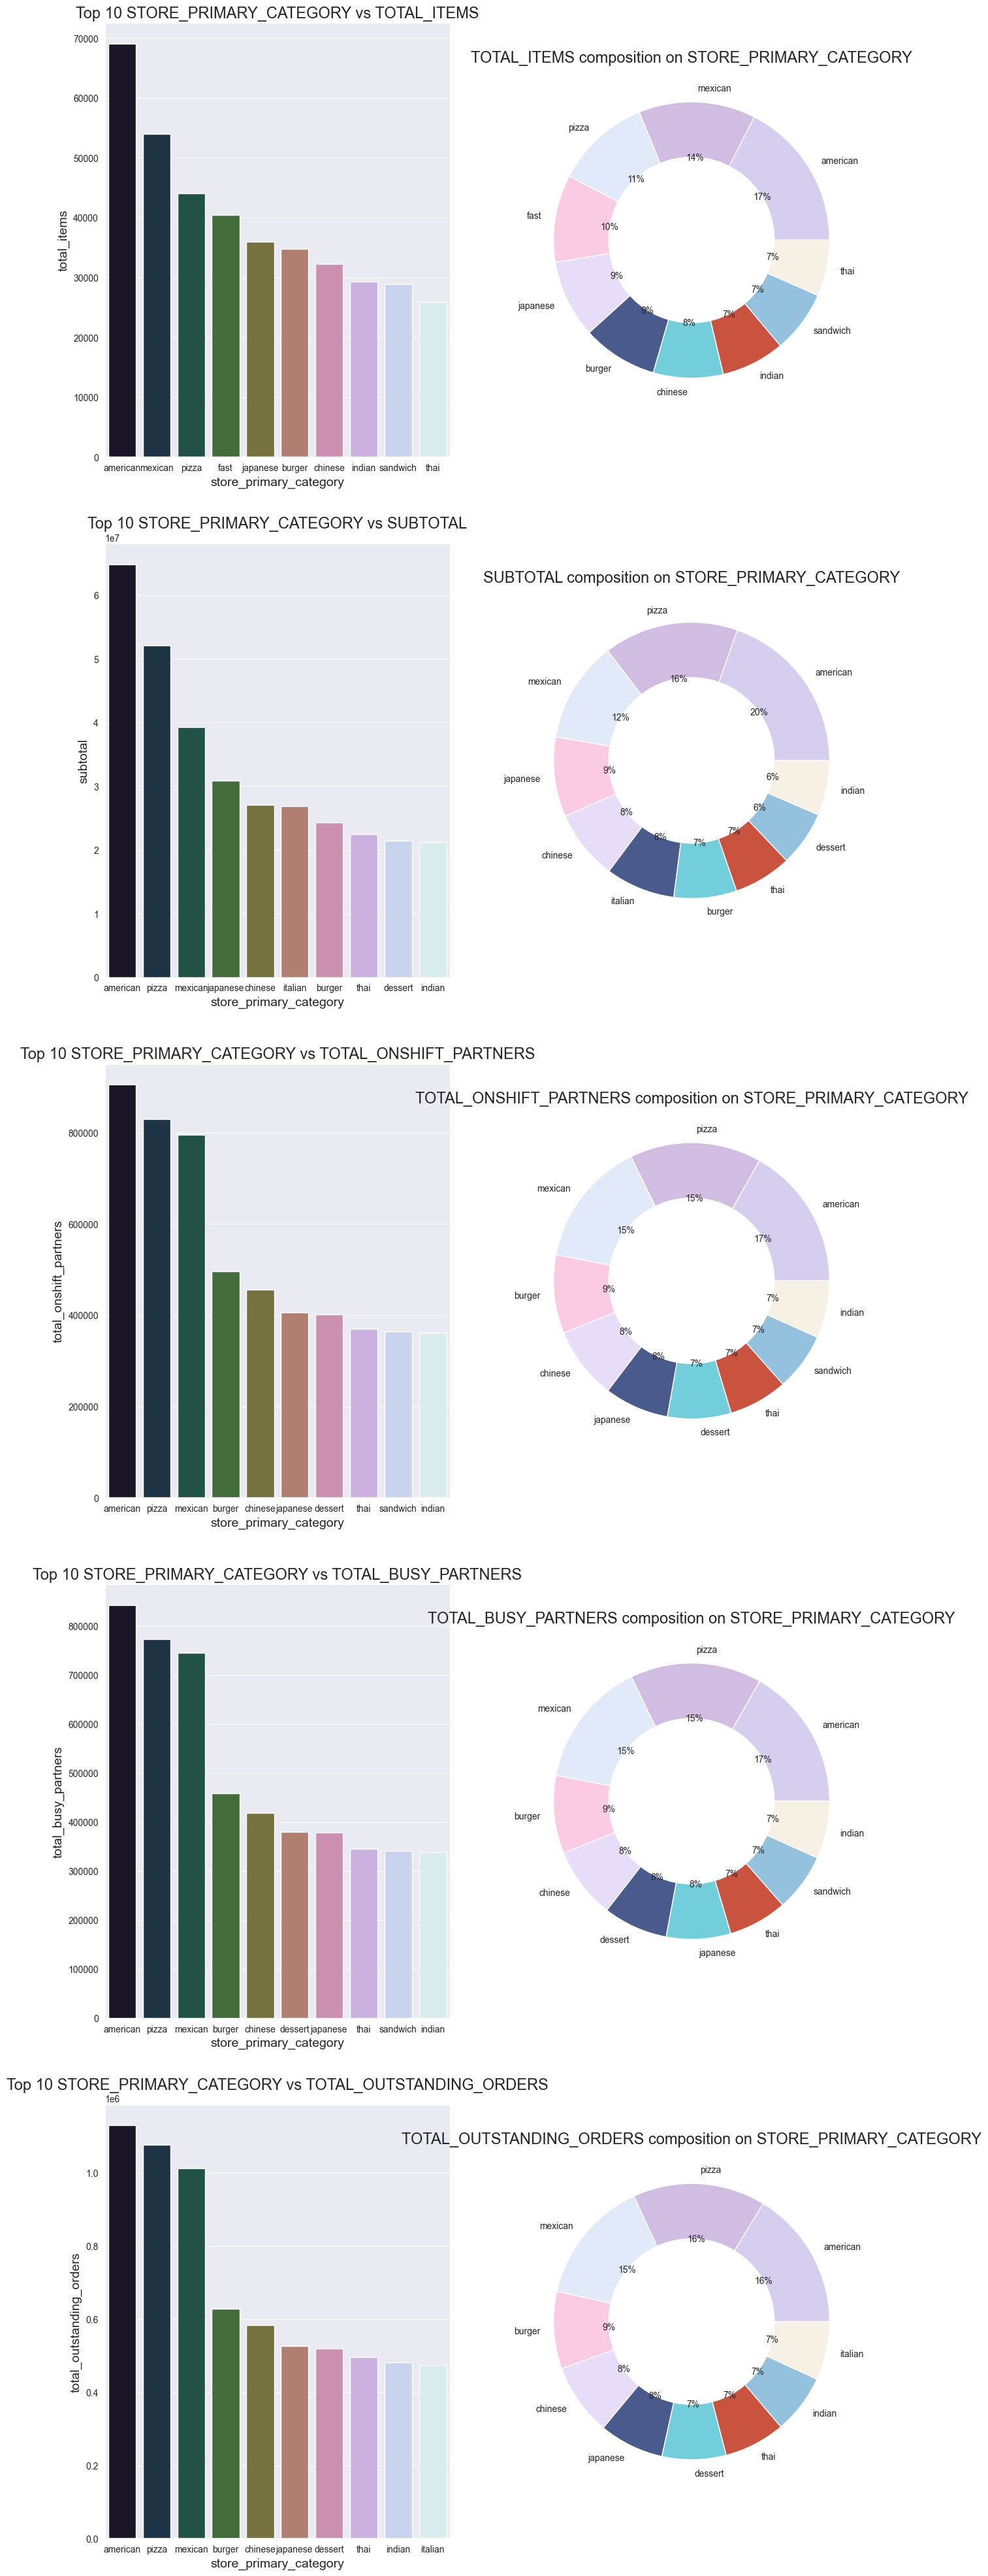

In [98]:
s = 'store_primary_category'
n = ['total_items','subtotal','total_onshift_partners','total_busy_partners',
     'total_outstanding_orders']
plt.figure(figsize = (15,50))
p = 1
for i in n:
    a = df.groupby(s)[i].sum().reset_index()
    a = a.sort_values(by = i,ascending = False)
    a = a.iloc[0:10,:]
    plt.subplot(5,2,p)
    sns.barplot(data = a, x = s,y = i,palette = 'cubehelix')

    plt.title(f'Top 10 {s.upper()} vs {i.upper()}',fontsize = 17)
    plt.xlabel(s,fontsize = 14)
    plt.ylabel(i,fontsize = 14)
    p+=1
    
    plt.subplot(5,2,p)
    plt.pie(a[i],labels =a[s],autopct = '%.0f%%',colors = color )
    centre_circle = plt.Circle((0,0),0.60,fc = 'white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(f'{i.upper()} composition on {s.upper()}',fontsize = 17)
    p+=1
plt.show()

## Observations:
- American products have the highest number of items in an order.
- American products have the highest number of busy ,onshift partners and outstanding orders.

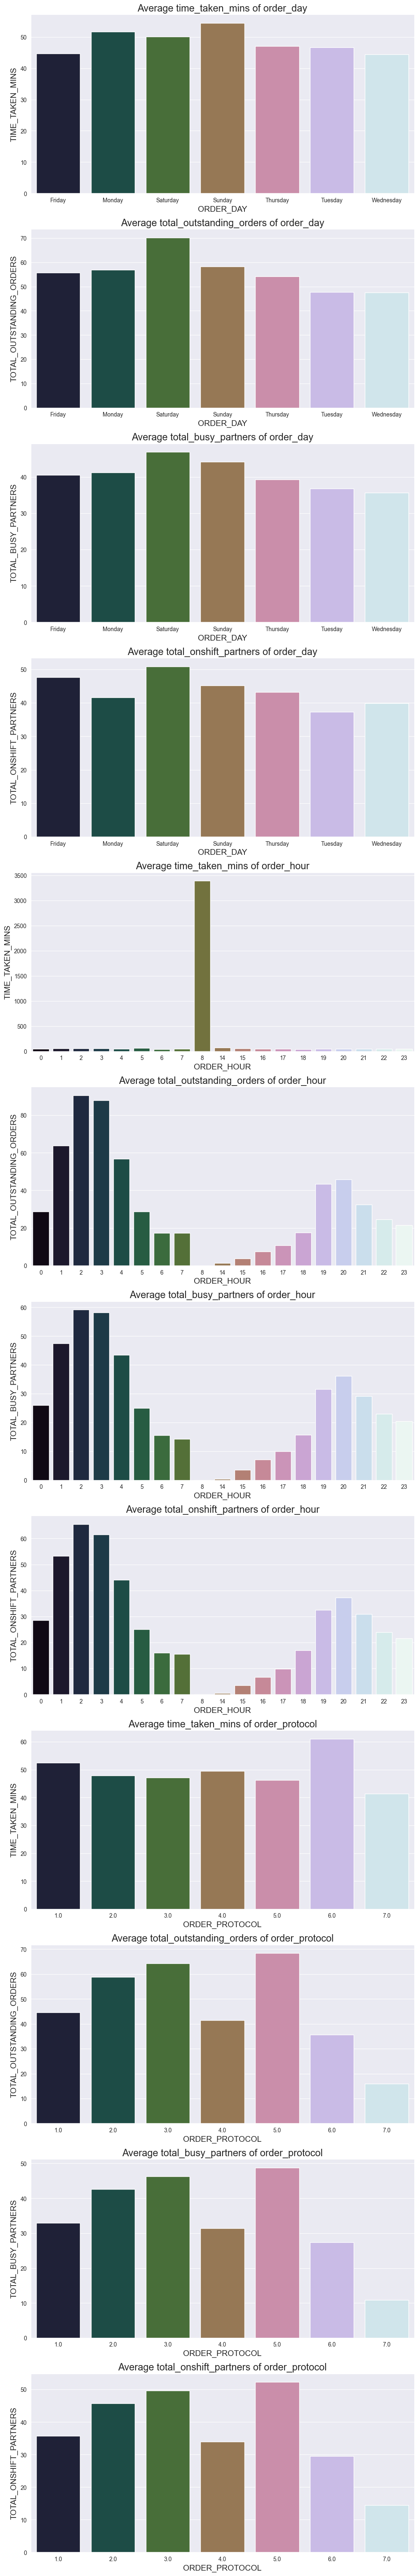

In [99]:
c = ['order_day','order_hour','order_protocol']
n = ['time_taken_mins','total_outstanding_orders','total_busy_partners','total_onshift_partners']
plt.figure(figsize = (12,80))
pos = 1
for i in c:
    for j in n:
        a = df.groupby(i)[j].mean().reset_index()
        plt.subplot(12,1,pos)
        sns.barplot(data = a, x = i,y = j,palette = 'cubehelix')
        plt.title(f"Average {j} of {i}",fontsize = 17)
        plt.xlabel(i.upper(),fontsize = 14)
        plt.ylabel(j.upper(),fontsize = 14)
        pos+=1
plt.show()

## Observations:
- Friday and Wednesday have the lowest average delivery time taken.
- Saturday has the highest average outstanding orders.
- Saturday has the highest average number of busy and onshift partners.
- At 8:00 AM it takes the highest average delivery time.
- At 2:00 AM outstanding orders have the highest average outstanding orders and average busy and onshift partners.
- Order protocol 5 has the highest number of average onshift partners ,average busy partners and average outstanding orders.

## Removing outliers

In [100]:
q1 = df['time_taken_mins'].quantile(0.25)
q3 = df['time_taken_mins'].quantile(0.75)
iqr = q3-q1
lower = q1-1.5*iqr
upper = q3+1.5*iqr
df_out = df.loc[(df['time_taken_mins']>=lower)&(df['time_taken_mins']<=upper)]

## Mulitvariate Analysis

In [101]:
a = df.groupby(['order_day','order_hour'])['time_taken_mins'].mean().reset_index()

In [102]:
def min_time(x):
    l = np.array(x['time_taken_mins'])
    m = np.array(x['order_hour'])
    i = np.argmin(l)
    x['order_hour'] = m[i]
    x['time_taken_mins'] = l[i]
    return x
b = a.groupby('order_day').apply(min_time)
b = b.set_index('order_day')
b = b.reset_index()

In [103]:
b.drop_duplicates(keep = 'first',inplace = True)
b

,order_day,order_hour,time_taken_mins
0,Friday,5,36.626383
18,Monday,6,32.383333
35,Saturday,6,41.431604
54,Sunday,14,38.491667
72,Thursday,21,37.876117
89,Tuesday,5,36.442672
106,Wednesday,6,35.552381


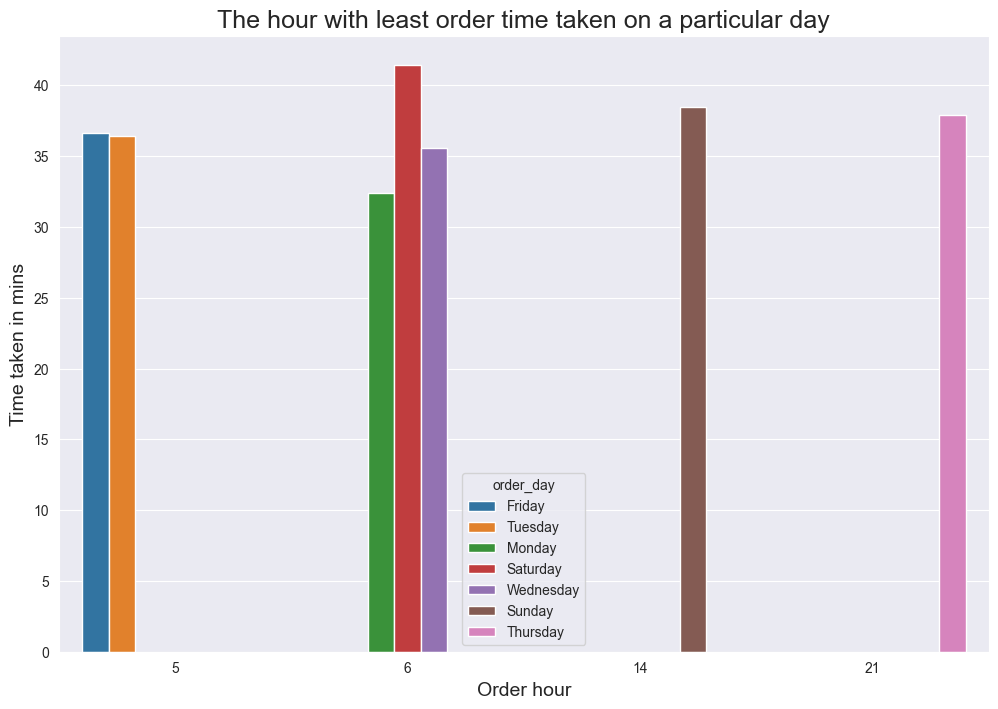

In [104]:
plt.figure(figsize = (12,8))
sns.barplot(data = b, x = 'order_hour',y = 'time_taken_mins',hue = 'order_day')
plt.title('The hour with least order time taken on a particular day',fontsize = 18)
plt.xlabel('Order hour',fontsize = 14)
plt.ylabel('Time taken in mins',fontsize = 14)
plt.show()

## Observations:
- On monday at 6:00 AM we have the lowest average delivery time.

In [124]:
a = df.groupby('order_protocol')[['total_onshift_partners','total_outstanding_orders']].mean().reset_index()
a

,order_protocol,total_onshift_partners,total_outstanding_orders
0,1.0,35.711827,44.643449
1,2.0,45.686554,58.772285
2,3.0,49.573375,64.327130
3,4.0,33.886380,41.478609
4,5.0,52.243373,68.386340
5,6.0,29.542821,35.599496
6,7.0,14.421053,15.947368


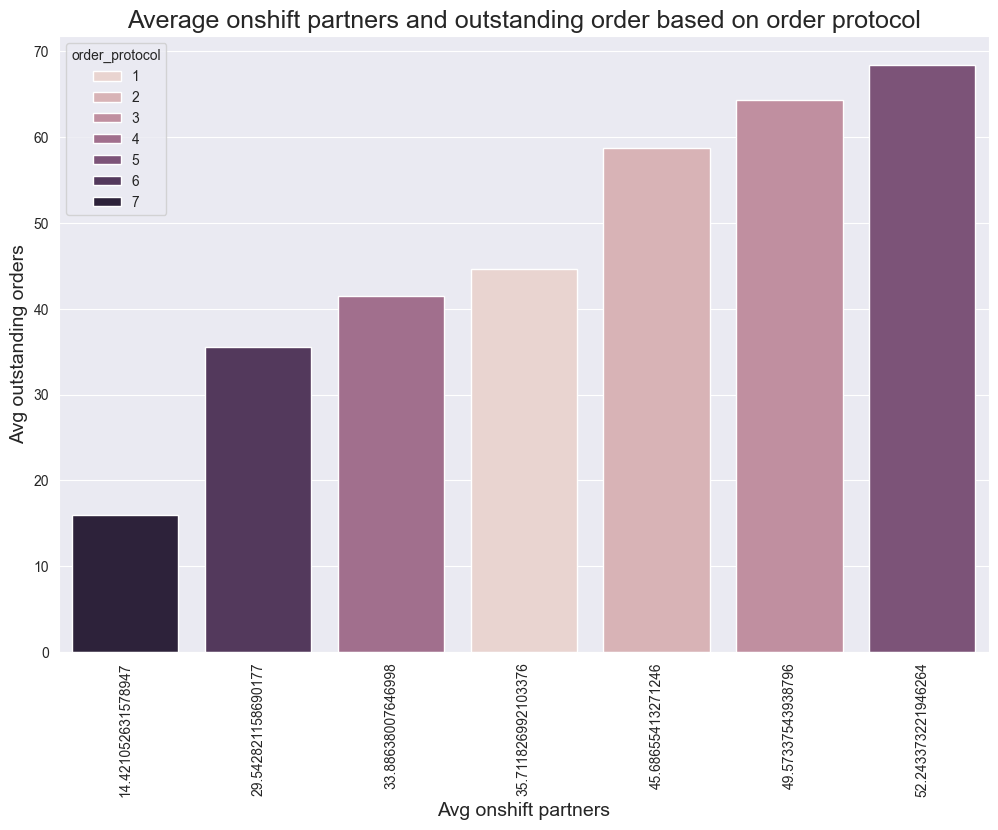

In [125]:
plt.figure(figsize = (12,8))
sns.barplot(data = a, hue= 'order_protocol',y = 'total_outstanding_orders',x = 'total_onshift_partners')
plt.title('Average onshift partners and outstanding order based on order protocol',fontsize = 18)
plt.xticks(rotation = 90)
plt.ylabel('Avg outstanding orders',fontsize = 14)
plt.xlabel('Avg onshift partners',fontsize = 14)
plt.show()

## Observations
- Order protocol 7 had the lowest average onshift partners and outstanding orders.
- Order protocol 5 had the highest average onshift partners and outstanding orders.

## Correlation

In [109]:
cols = ['market_id','order_protocol',      
        'total_items','subtotal','num_distinct_items','min_item_price',        
        'max_item_price','total_onshift_partners','total_busy_partners',      
        'total_outstanding_orders','time_taken_mins',      
        'order_hour']
df_corr = df[cols].corr()

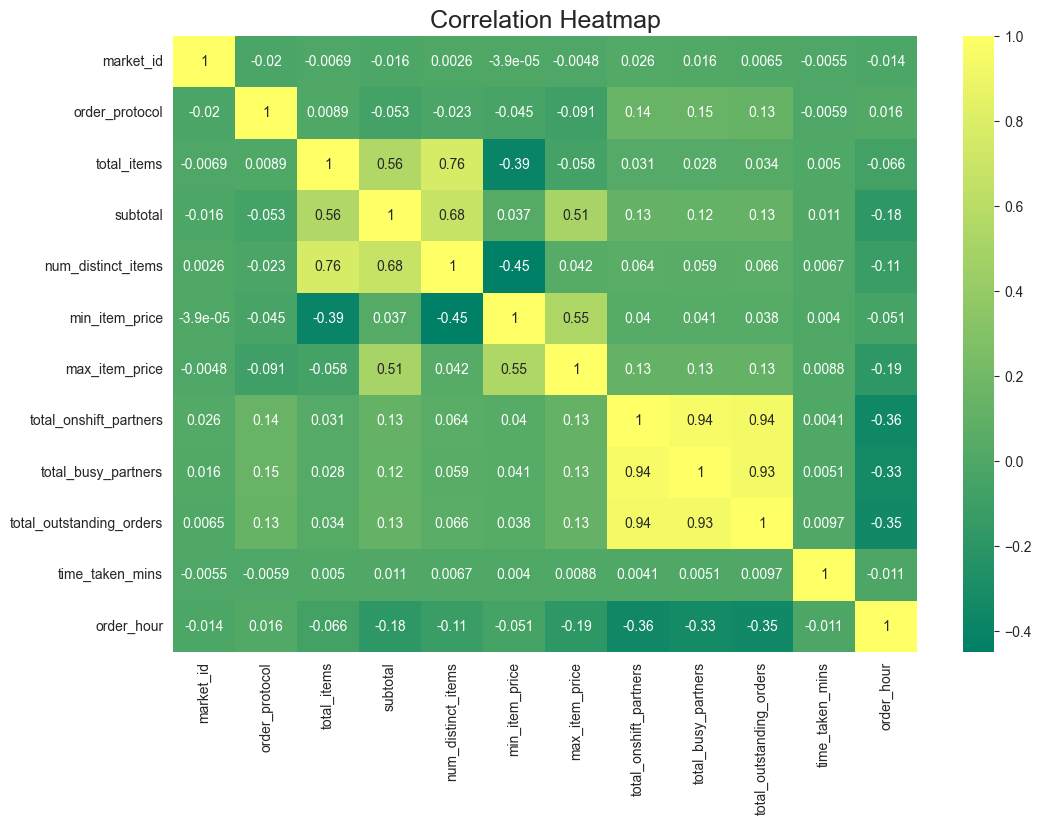

In [110]:
plt.figure(figsize =(12,8))
sns.heatmap(data = df_corr,annot = True,cmap = 'summer')
plt.title('Correlation Heatmap',fontsize = 18)
plt.show()

## Observations:
- Strong positive correlation between 
    - total busy partners
    - outstanding orders
    - onshift partners

## Getting the data ready for the Model

In [111]:
X = df_out.drop(['created_at','actual_delivery_time','store_id','time_taken_mins'],axis = 1)
y = df_out['time_taken_mins']
le = LabelEncoder()
X['store_primary_category'] =le.fit_transform(X['store_primary_category'])
X['order_day'] = le.fit_transform(X['order_day'])
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191143 entries, 0 to 197427
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 191143 non-null  float64
 1   store_primary_category    191143 non-null  int32  
 2   order_protocol            191143 non-null  float64
 3   total_items               191143 non-null  int64  
 4   subtotal                  191143 non-null  int64  
 5   num_distinct_items        191143 non-null  int64  
 6   min_item_price            191143 non-null  int64  
 7   max_item_price            191143 non-null  int64  
 8   total_onshift_partners    191143 non-null  float64
 9   total_busy_partners       191143 non-null  float64
 10  total_outstanding_orders  191143 non-null  float64
 11  order_hour                191143 non-null  int32  
 12  order_day                 191143 non-null  int32  
dtypes: float64(5), int32(3), int64(5)
memory usage: 1

## Splitting the data for training and testing

In [112]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 34)
print('X_train shape : ',X_train.shape)
print('X_test shape : ',X_test.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape : ',y_test.shape)

X_train shape :  (152914, 13)
X_test shape :  (38229, 13)
y_train shape :  (152914,)
y_test shape :  (38229,)


## Standardization
Standardizing the training data

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = X_train.columns
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns = cols)


Standardizing the test data separately to prevent data leakage

In [114]:
cols = X_test.columns
X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test,columns = cols)
X_test.shape

(38229, 13)

## Building the model

In [115]:
import tensorflow
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12,input_shape = (X_train.shape[1],),activation = 'relu'))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(200,activation = 'relu'))
model.add(Dense(150,activation = 'relu'))
model.add(Dense(1,activation = 'linear'))



## Model Architecture

In [116]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 12)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │           1,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 150)                 │          30,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             151 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,969 (203.00 KB)

 Trainable params: 51,969 (203.00 KB)

 Non-trainable params: 0 (0.00 B)

## Fitting the model

In [117]:
adam = keras.optimizers.Adam(learning_rate = 0.01)
model.compile(loss = 'mse',optimizer = adam,metrics = ['mse','mae'])
values = model.fit(X_train,y_train, epochs = 50, batch_size = 20000,verbose = 1)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 1770.9028 - mae: 38.1167 - mse: 1770.9028
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 441.5306 - mae: 16.4341 - mse: 441.5306
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 358.9452 - mae: 14.6229 - mse: 358.9452
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 275.2143 - mae: 13.1364 - mse: 275.2143
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 245.6526 - mae: 12.1629 - mse: 245.6526
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 227.8397 - mae: 11.8657 - mse: 227.8397
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 216.4634 - mae: 11.7274 - mse: 216.4634
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 211.0250 - mae: 11.5682 - mse: 211.0250
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 204.3711 - mae: 11.3502 - mse: 204.3711
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 200.8869 - mae: 11.2664 - mse: 200.8869
Epoch 11/50
8/8 ━━━━━━━━━━━

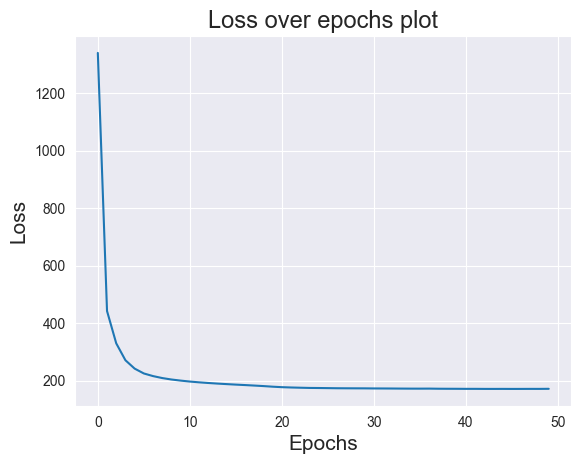

In [118]:
ep = [i for i in range(len(values.history['loss']))]
plt.plot(ep,values.history['loss'])
plt.title('Loss over epochs plot',fontsize = 17)
plt.xlabel('Epochs',fontsize = 15)
plt.ylabel('Loss',fontsize = 15)
plt.show()

In [119]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [120]:
mse = mean_squared_error(y_test,model.predict(X_test))
rmse = mse**.5
mae = mean_absolute_error(y_test,model.predict(X_test))
print('r2_score : ',r2_score(y_test,model.predict(X_test)))
print('mse : ',mse)
print('rmse : ',rmse)
print('mae : ',mae)

1195/1195 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step
r2_score :  0.21336451496028153
mse :  172.07551532666002
rmse :  13.117755727511472
mae :  10.2790997590912


## Building NN with different combinations of hyperparameters

In [121]:
model1 = Sequential()
model1.add(Dense(5,input_shape = (X_train.shape[1],),activation = 'relu'))
model1.add(Dense(100,activation = 'relu'))
model1.add(Dense(250,activation = 'relu'))
model1.add(Dense(1,activation = 'linear'))

## Architecture of the model
- First Layer with 5 Neurons and activation function is rectified linear unit.
- Second layer with 100 Neurons and activation function is rectified linear unit.
- Third layer with 250 Neurons and activation function is rectified linear unit.
- Fourth layer with 1 Neurons and activation function is linear .

In [122]:
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 5)                   │              70 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 100)                 │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 250)                 │          25,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             251 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,171 (102.23 KB)

 Trainable params: 26,171 (102.23 KB)

 Non-trainable params: 0 (0.00 B)

In [123]:
sgd = keras.optimizers.SGD(learning_rate = 0.01)
model1.compile(loss = 'mse',optimizer = sgd,metrics = ['mse','mae'])
values1 = model.fit(X_train,y_train, epochs = 50, batch_size = 20000,verbose = 1)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 171.8072 - mae: 10.3730 - mse: 171.8072
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 169.7860 - mae: 10.3282 - mse: 169.7860
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 170.4742 - mae: 10.3565 - mse: 170.4742
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 170.5865 - mae: 10.3747 - mse: 170.5865
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 170.8830 - mae: 10.3893 - mse: 170.8830
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 169.7086 - mae: 10.3450 - mse: 169.7086
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 170.5162 - mae: 10.3648 - mse: 170.5162
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 170.6116 - mae: 10.3652 - mse: 170.6116
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 170.2238 - mae: 10.3668 - mse: 170.2238
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 169.9125 - mae: 10.3436 - mse: 169.9125
Epoch 11/50
8/8 ━━━━━━━━━━━━━

## Questions

Defining the problem statements and where can this and modifications of this be used?
- Problem Statements:  Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's 40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000 driver-partners by providing them with consistent earning and independence. Currently, the company has serviced 5 million customers. Porter works with a wide range of restaurants for delivering their items directly to the people.Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners. This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features.
- Use case of this Modifications: With slight modifications of this business case we can predict delivery time or number of partners available or we can forecast the number of orders that required to be delivered.

List 3 functions the pandas datetime provides with one line explaination.
- pd.to_datetime() : Converts a column or an array of date-like strings into pandas date-time objects.
- dt accessor : Provides accesss to various datetime components like year, month , days etc.
- pd.date_range() : Generates a range of dates based on specified start and end dates, with optional frequency.

Short note on dateime, timedelta, time span.
- Datetime refers to a specific point in time, including both date and time components.
- A timedelta represents a duration or difference between 2 datetime periods.
- A time span represents a fixed duraction, often used for frequency-based calculations.

Why do we need to check for outliers in our data?
- Outliers can distort summary statistics such as the mean, median, and standard deviation.
- Outliers can adversely affect the performance of statistical models and machine learning algorithms.
- Many statistical tests assume that the data follows normal distribution. Outliers violate these assumptions and can lead to incorrect conclusions when performing hypothesis tests.

Name 3 outlier removal methods?
- Zscore
- IQR
- Trimming

What classical machine learning methods can we use for this problem?
- Linear Regression 
- Random Forest

Why is scaling required for neural networks?
- Scaling improves convergence, stability, and overall performance of NNs by making features comparable in magnitude.

Briefly explain your choice of optimizer.
- Updates the weights based on a random batch of the dataset.
- Uses both the Momentum and RMSprop techniques to reduce training time and variance.
- Removes biasness so to have a better moving average at the starting.

Which activation function did you use and why?
- The Rectified Linear Unit (ReLU) is a widely used activation function in neural networks.
- To­ reduce p­ossibility ­of vanishing Gradient and faster c­onvergence.

Why does a neural network perform well on a large dataset?
- Neural networks thrive on large datasets because of their capacity for complexity, non-linearity, and feature extraction. The abundance of training examples enables them to learn meaningful representations and achieve impressive results.

## Business Insights
- Market ID 2 has the highest number of orders and market id 6 has the lowest number of orders.
- Order protocol 1 has the higest number of orders and 7 has the lowest number of orders.
- The highest number of orders were observed at 2 AM.
- The highest number of orders were observed on Saturday.
- Most of the  orders had 2 disctint items.
- Among the top 10 highest ordered store primary category, American had the highest number of orders.
- Majority of the orders had 2 total items.
- Market id 4 has the highest on average total items ordered. 
- Market id 4 has the highest on average subtotal itmes ordered.
- Market id 2 has the highest number of average onshift partners.
- Both market id 2 and 4 have the highest number of average busy partners and average outstanding orders.
- Market 2 has the lowest average delivery time taken.
- Order protocol 4 has the higest on average total items ordered.
- Order protocol 7 has the highest on average subtotal items ordered.
- Order protocol 5 has the highest number of average onshift partners ,average busy partners and average outstanding orders.
- Order protocol 7 has the lowest average delivery time taken.
- American products have the highest number of items in an order.
- American products have the highest number of busy ,onshift partners and outstanding orders.
- Friday and Wednesday have the lowest average delivery time taken.
- Saturday has the highest average outstanding orders.
- Saturday has the highest average number of busy and onshift partners.
- At 8:00 AM it takes the highest average delivery time.
- At 2:00 AM outstanding orders have the highest average outstanding orders and average busy and onshift partners.
- Order protocol 5 has the highest number of average onshift partners ,average busy partners and average outstanding orders.
- On monday at 6:00 AM we have the lowest average delivery time.

## Recommendations
- Porter should come up with strategies that effeciently divides the onshift partners to reduce the delivery time.
- Porter should do more research on reducing the order protocols delivery time.
- Porter should focus more on product categories that have less number of orders.